# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model #build linear regressioon model
from sklearn.metrics import mean_squared_error, r2_score #compute performance

# Load Dataset

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Preprocessing

## Handling Missing Data

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## creating unique nummerical data for labels

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [10]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [12]:
df['sex'].unique()

array([0, 1])

In [13]:
df['smoker'].unique()

array([1, 0])

In [14]:
df['region'].unique()

array([3, 2, 1, 0])

## Split Data

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']



In [19]:
X.shape


(1338, 6)

In [20]:
y.shape

(1338,)

In [21]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Feature Scalling (Standardization/normalization)

In [22]:
# Standardization, also known as z-score normalization, transforms the features so that they have a mean of 0 and a standard deviation of 1.

### Train

In [51]:
scaler = StandardScaler().fit(X_train)

In [24]:
scaler.mean_
#mean for every column under the dataset

array([39.0046729 ,  0.50934579, 30.67012617,  1.0953271 ,  0.20560748,
        1.51495327])

In [25]:
# get the varience
scaler.scale_

array([13.96340265,  0.49991265,  6.12284092,  1.20756054,  0.40414483,
        1.11290676])

In [52]:
#transform
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 1.00228629, -1.01886959, -0.66474472, -0.90705771, -0.50874702,
        -0.46271017],
       [ 1.00228629,  0.98147988, -1.51402369, -0.07894188, -0.50874702,
         1.33438558],
       [-1.50426607,  0.98147988,  1.08117685, -0.90705771, -0.50874702,
         0.43583771],
       ...,
       [ 0.85905473, -1.01886959,  0.70063454,  0.74917395,  1.96561348,
        -1.36125804],
       [ 0.07128113, -1.01886959, -1.38009893,  0.74917395,  1.96561348,
         0.43583771],
       [ 1.28874942,  0.98147988, -0.44589206, -0.07894188, -0.50874702,
         0.43583771]])

In [53]:
X_train_scaled.mean(axis=0)
#its mean should be 0 if its standardized

array([-2.44041547e-16, -2.98826384e-17, -7.33784788e-16, -6.64058632e-18,
        3.40330049e-17,  4.98043974e-17])

In [54]:
X_train_scaled.std(axis=0)
#std should be 1

array([1., 1., 1., 1., 1., 1.])

### Test

In [30]:
scaler1 = StandardScaler().fit(X_test)

In [31]:
scaler1.mean_
#mean for every column under the dataset

array([40.01492537,  0.48880597, 30.63652985,  1.09328358,  0.20149254,
        1.51865672])

In [32]:
# get the varience
scaler1.scale_

array([14.33630454,  0.49987468,  5.98709275,  1.19493319,  0.40111506,
        1.07012818])

In [33]:
#transform
X_test_scaled = scaler1.transform(X_test)
X_test_scaled

array([[-1.46585372,  1.02264438,  0.81733662, -0.91493281, -0.50233101,
        -0.48466784],
       [ 1.18475961,  1.02264438,  0.15090298, -0.91493281, -0.50233101,
        -0.48466784],
       [ 0.76624172,  1.02264438,  1.0628648 , -0.91493281, -0.50233101,
         1.38426715],
       ...,
       [ 0.48722979,  1.02264438,  1.38689519,  0.75880093,  1.99071921,
         0.44979965],
       [-1.46585372, -0.97785703,  0.99187876, -0.91493281, -0.50233101,
        -0.48466784],
       [-0.349806  , -0.97785703, -0.75354267, -0.91493281, -0.50233101,
        -1.41913534]])

In [34]:
X_test_scaled.mean(axis=0)
#its mean should be 0 if its standardized

array([ 2.25358704e-16,  9.94229574e-18,  1.75647225e-16, -5.30255773e-17,
       -3.97691830e-17, -1.39192140e-16])

In [35]:
X_test_scaled.std(axis=0)
#std should be 1

array([1., 1., 1., 1., 1., 1.])

# Simple Linear Regression

## Build Linear Regression

In [55]:
model = linear_model.LinearRegression()

## Build Training Model

In [56]:
model.fit(X_train_scaled, y_train)

LinearRegression()

## Make prediction with trained model

In [57]:
y_pred = model.predict(X_test_scaled)

## Prediction Results

### Print Model Performance

In [58]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Coefficients, {model.coef_}')
print(f'Intercept, {model.intercept_}')
print(f'Mean Squared Error {mse:.2f}')
print(f'Coefficient of determination {r2:.2f}')

Coefficients, [3602.77541857 -122.13671165 1929.20311613  497.80337376 9605.29975404
 -367.95675551]
Intercept, 13230.161574933647
Mean Squared Error 35467031.51
Coefficient of determination 0.76


In [59]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [42]:
# Fomula of  sstraight line is Y = mx + c
# The equation o this linear regression model(model) is [y = 4.02393743e+00(lotsize) + 3.43166434e+03(bedrooms) + 1.58137047e+04(bathrms) + 7.53423338e+03(stories) + 9.90935902e+03(driveway) + 5.33701222e+03(garagepl) -9131.131513727261]

# the Coefficients are accociated to the features from the X varible so you just muliply the Coefficients by their associate feater and add everything toger plus the intercep

# PLot

In [60]:
y_pred.shape

(268,)

In [61]:
y_test_arr = np.array(y_test)
y_test_arr.shape

(268,)

<Axes: >

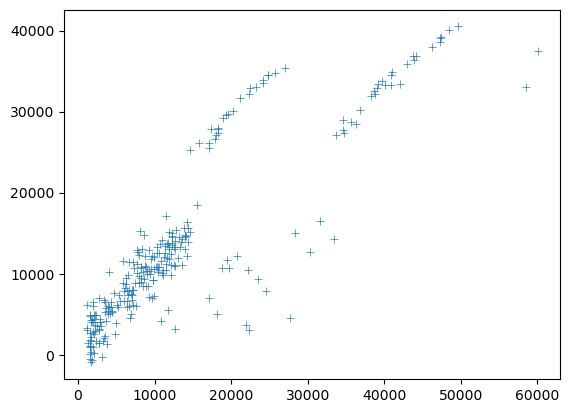

In [62]:
sns.scatterplot(x = y_test_arr, y = y_pred, marker="+")

<Axes: >

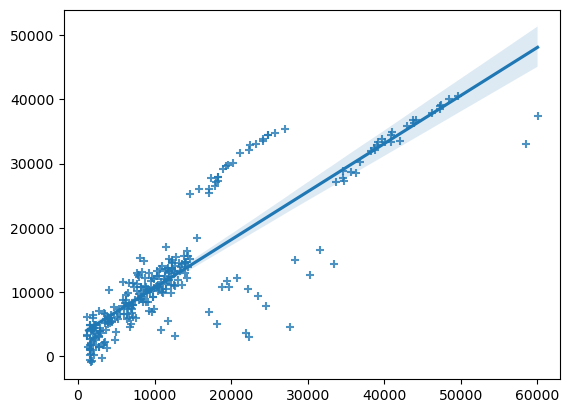

In [63]:
sns.regplot(x=y_test_arr, y=y_pred, marker="+")